# Single Neuron Linear Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Supervised%20Learning/Parametric%20Modeling/Lecture%203%20Single%20Neuron%20Logistic%20Regression/Linear_Regression.ipynb)

In [2]:
# !pip install ucimlrepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# import the dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 

# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features.values
y = rice_cammeo_and_osmancik.data.targets.values

In [3]:
df_var=rice_cammeo_and_osmancik.variables
var_name=df_var['name']
# Convert each entry of y with Cammeo to 1 and otherwise -1, which is the sign function
y=np.where(y=='Cammeo',1,0)
# Standardize the value of X
X=np.array([X[:,i]/X[:,i].max() for i in range(X.shape[1])]).T
# concatenate X and y
data = np.concatenate((X,y),axis=1)
# generate the Dataframe
df=pd.DataFrame(data,columns=var_name)

In [4]:
df

name,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,0.805319,0.958306,0.961254,0.791258,0.979826,0.817687,0.665346,1.0
1,0.774917,0.901294,0.861971,0.852975,0.944513,0.789151,0.714751,1.0
2,0.773754,0.913713,0.895805,0.816127,0.962143,0.782973,0.805132,1.0
3,0.696664,0.835712,0.808908,0.813152,0.940775,0.699932,0.744056,1.0
4,0.776609,0.924735,0.885917,0.830486,0.956418,0.799099,0.750275,1.0
...,...,...,...,...,...,...,...,...
3805,0.604928,0.758248,0.713302,0.797421,0.911682,0.608828,0.790909,0.0
3806,0.614657,0.768335,0.701705,0.831881,0.892240,0.623279,0.806317,0.0
3807,0.657590,0.806823,0.768054,0.807142,0.929470,0.662077,0.727877,0.0
3808,0.522498,0.715288,0.674422,0.727252,0.922363,0.528666,0.765419,0.0


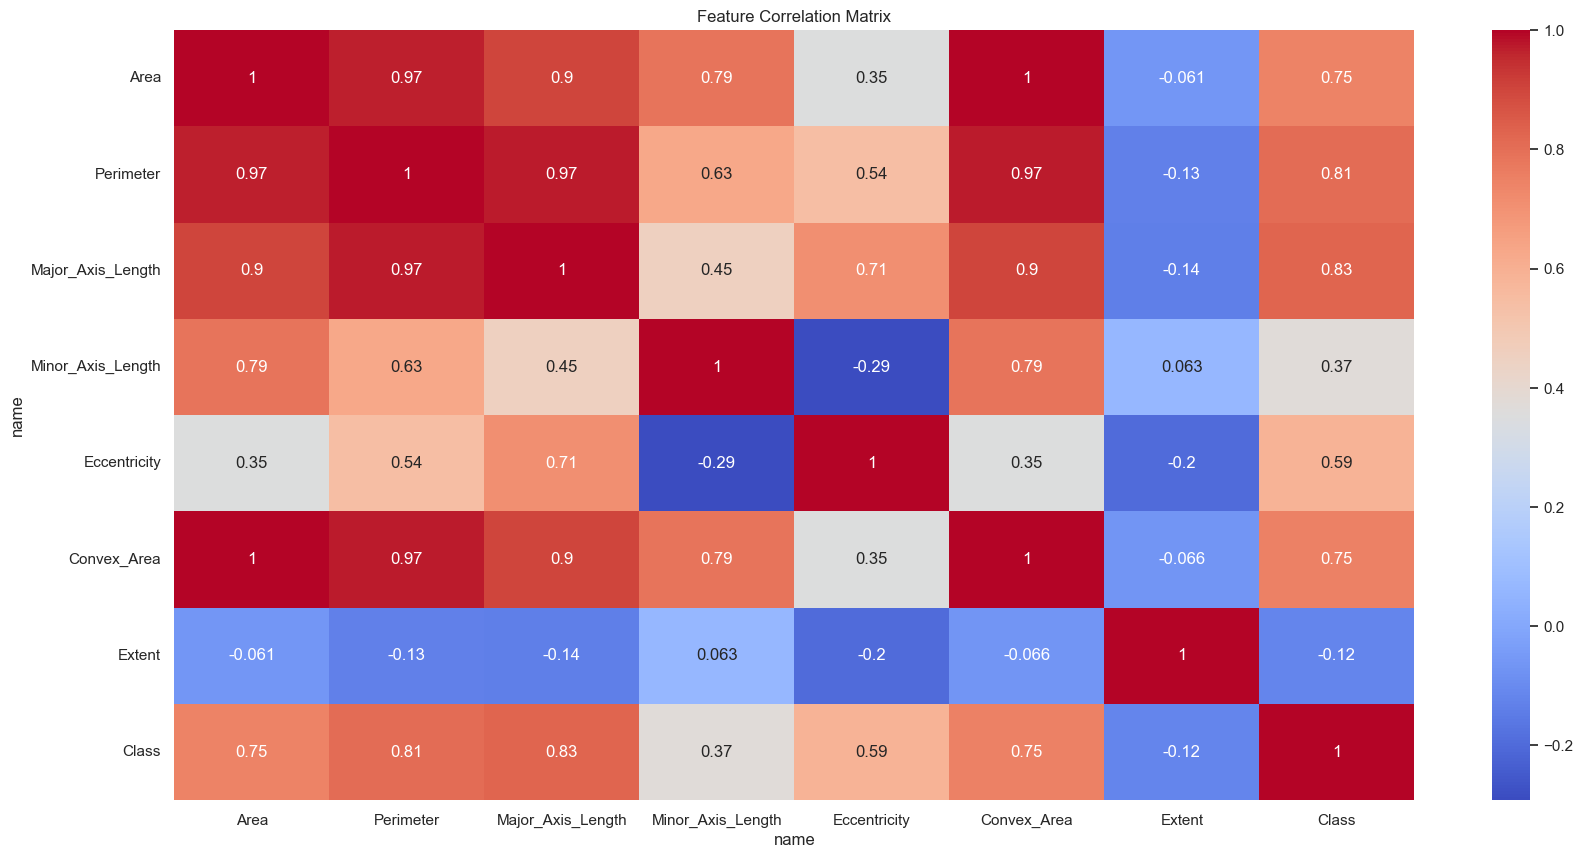

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

From the correlation grahp, we see that Perimeter is highly correlated with Major_Axis_Length, so we will run the linear regression on these 2 variables

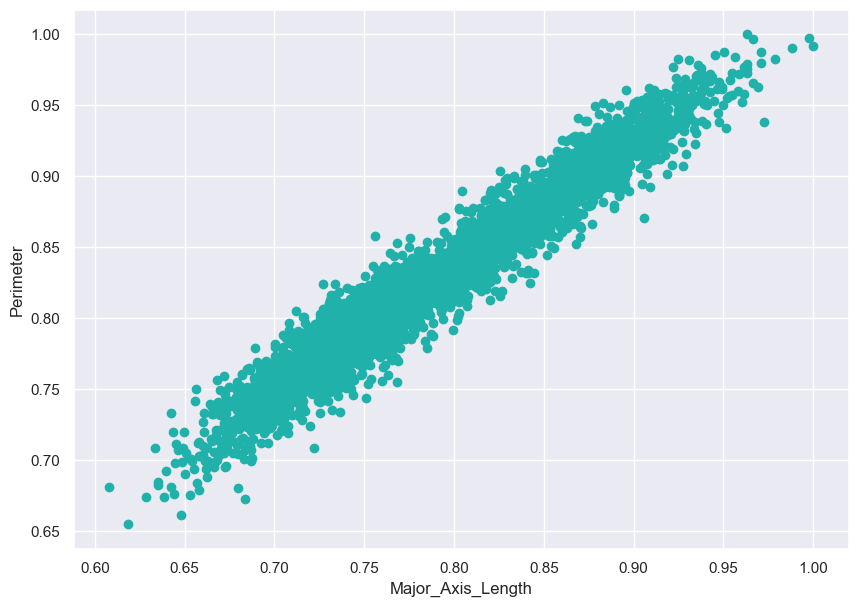

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(df.Major_Axis_Length,
            df.Perimeter,
            color='lightseagreen')
plt.xlabel('Major_Axis_Length')
plt.ylabel('Perimeter')
plt.show()

In [7]:
# define the Sigmoid function 
def linear(z):
    return z

In [8]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

In [9]:
def MSE(y_hat, y):
    return .5 * (y_hat - y)**2

In [11]:
node = SingleNeuron(linear, MSE)

X = df.Major_Axis_Length.values
X = X.reshape(-1,1)
y = df.Perimeter.values

node.train(X, y, alpha = 0.01, epochs = 10_000)

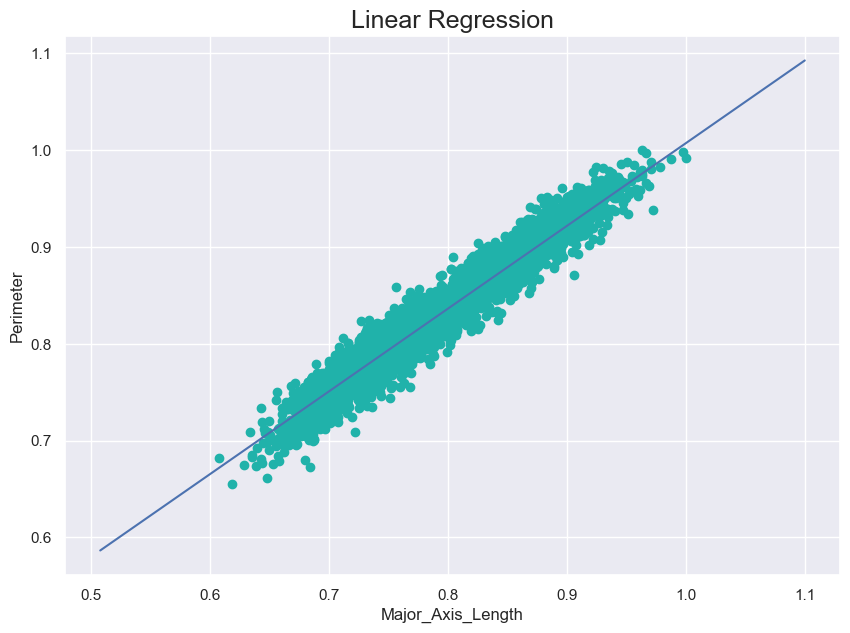

In [17]:
domain=np.linspace(X.min()-0.1,X.max()+0.1,100)

plt.figure(figsize=(10,7))
plt.scatter(df.Major_Axis_Length,
            df.Perimeter,
            color='lightseagreen')
plt.plot(domain,node.predict(domain.reshape(-1,1)))
plt.xlabel('Major_Axis_Length')
plt.ylabel('Perimeter')
plt.title('Linear Regression',fontsize=18)
plt.show()

Now that we have trained the variable node, we can now visualize the binary cross entropy loss over each epoch by plotting the values in the SingleNeuron.errors_ attribute. This can be done by running the following code in the cell below. 

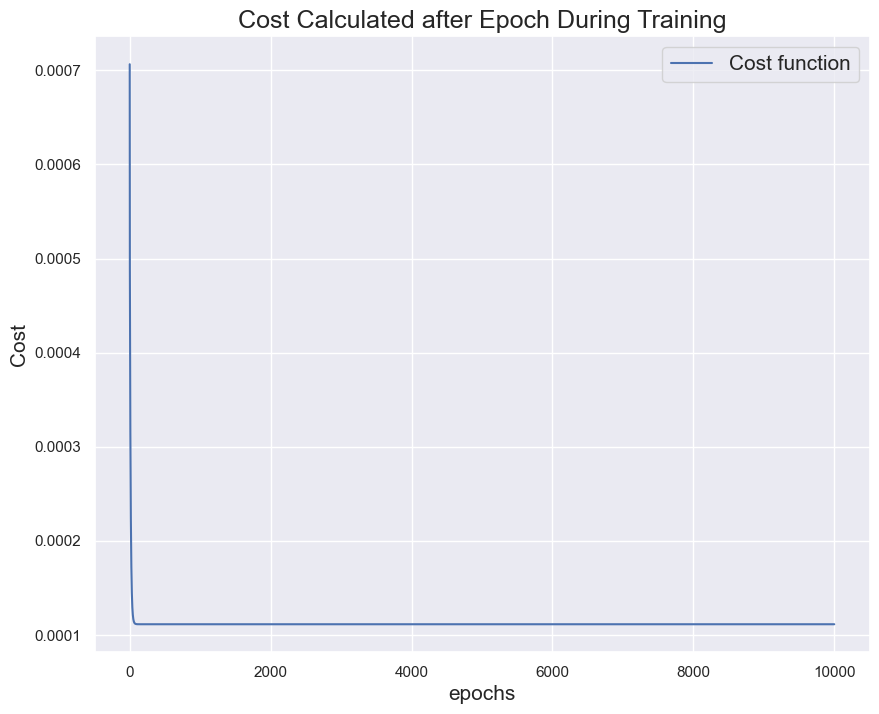

In [18]:
node.plot_cost_function()
plt.show()

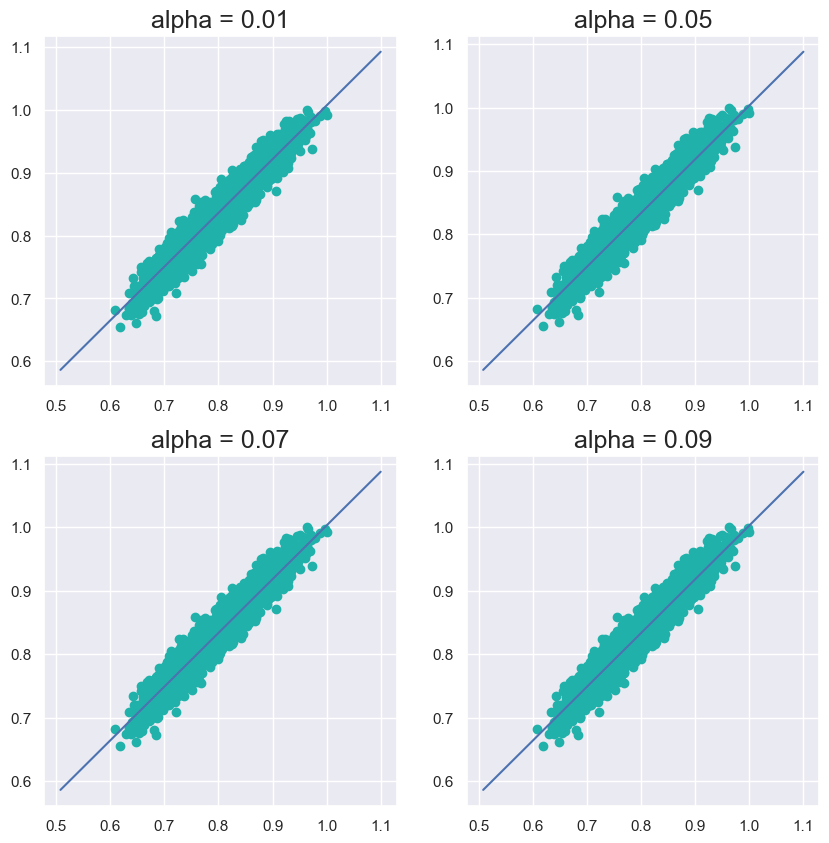

In [21]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .1, np.max(X) + .1, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear, MSE)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)